# Facet Grids, Comparative Bar Charts & Consolidation of Other Charts - Tasks


This task picks up from where we left off previously. The dataset is entirely numerical and all null and incorrect data has been handled.

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the dataset
df = pd.read_csv('titanic_data_numeric_only.csv')

In [3]:
#Check the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Gender           int64
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
dtype: object

## Visualising the Data
Remember to add the relevant libraries at the top of the document

In [4]:
#Display the first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,1


### 1 A Correlation Matrix

In [5]:
#Create a Correlation Matrix and save the output to a new DataFrame
#In newer versions of Jupyter, you sometimes get an error with the .corr() method.
#In previous versions the .corr() method automatically disregarded object type data.

#If you get an error - create a temporary data frame with the numeric data first and use the temporary dataframe to create the correlation matrix
#sometimes it doesn't like floats!
#temp_df = df.iloc[:,[0, 1, 2, 4, 5, 7, 8, 9, 10]]
#correlationMatrix = temp_df.corr()

#use the current dataframe to generate the correlation matrix
correlationMatrix =  df.corr()

#Display the contents of the Correlation Matrix
correlationMatrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.162184
Gender,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,0.082853,0.074115,-0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,0.074115,-0.148258,1.000000,-0.499421


### 2 Create a Heatmap
Using the correlation matrix you just created produce a heatmap. The following link will help: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e 
* Ensure that your heatmap has annotations
* Give it a meaningful title
* Identify the features with the strongest correlation

***Note***: If the annotations do not display properly you may have to lower the version of matplotlib in the Anaconda Environment - I moved to version 3.7.1 and it worked

Text(0.5, 1.0, 'Correlation Heatmap')

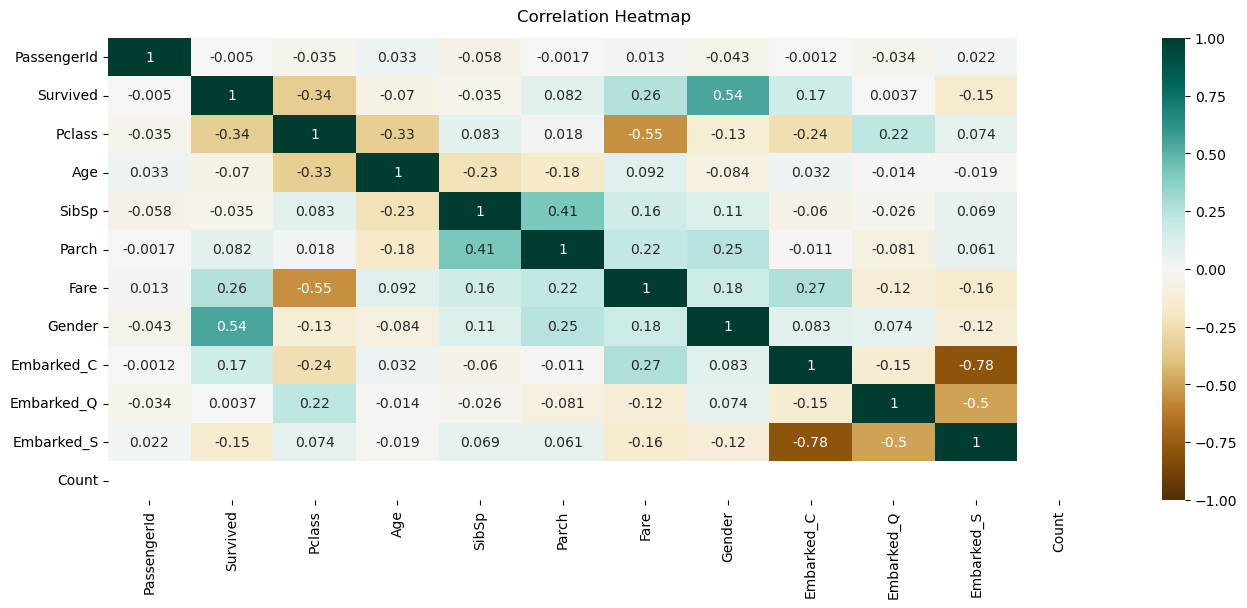

In [28]:
#Create the Heatmap
 
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more 
#features (such as title).

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True
#to display the correlation values on the heatmap.
 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot=True)
 
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### 3 A Countplot Showing The Number of Passengers in each Class

This Countplot has annotations, unlike the basic Countplot we used previously

#### Perform the Counts - It is not necesssary to perform this count - it is only a check for you
When you use this type of chart, and specify the column, the different values are counted and the bars created

In [7]:
#First - write code to count the number of passengers in each class, in your dataframe
#This will help you determine if your chart is accurate - 
  #It is NOT a step that you have to do because the countplot does it itself
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

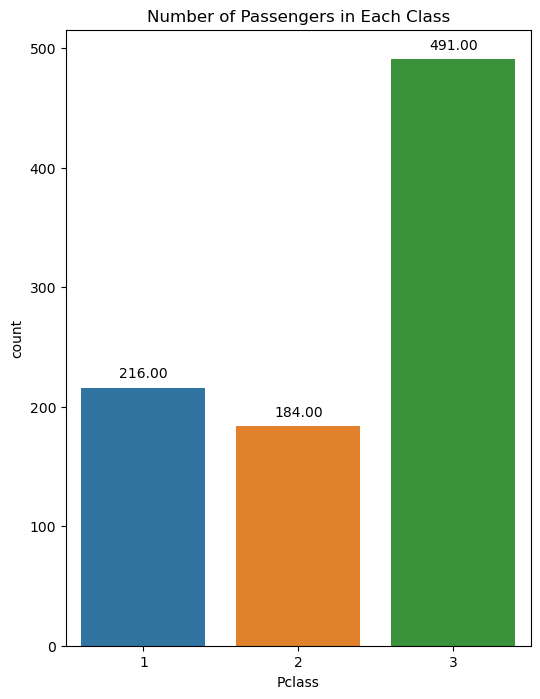

In [8]:
#Set the plot size to 6 by 8
plt.figure(figsize=(6, 8))

#Create a countplot to show the number of passengers in each class
#Assign the chart to a variable called countPlt
countPlt = sns.countplot(x='Pclass', data=df)

#Format the annotations
for p in countPlt.patches:
    countPlt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


#Add a meaningful title
plt.title('Number of Passengers in Each Class')

#Display the plot
plt.show()


### 4 Create a Countplot Showing Passengers By Gender

Remember: in the Gender column - 0 means male and 1 means female 
  
* Give your Countplot a meaningful title
* Ensure that it has annotations
* Test that your chart displays
* Then add the following code above plt.show() to add meaningful labels to the ticks:

#Make the tick labels meaningful  - use this code:  
ticks, labels = plt.xticks()  
labels = ['Male', 'Female']  
plt.xticks(ticks, labels)

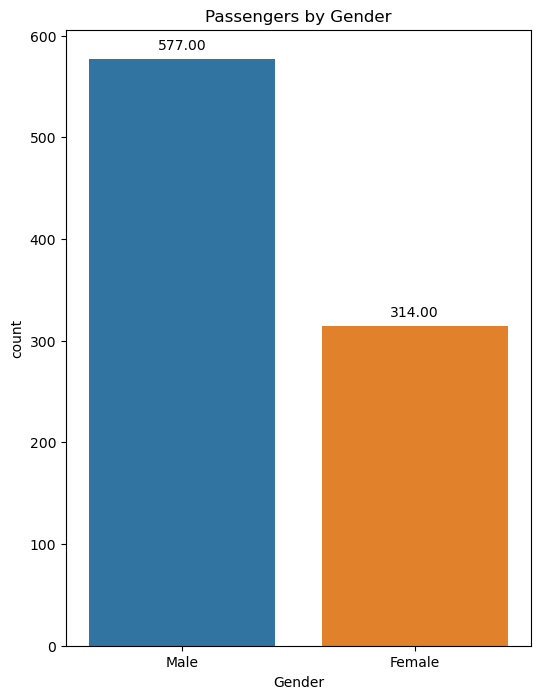

In [9]:
#### Create a Countplot with Annotaions to show the Number of Passengers by Gender
#Set the plot size to 6 by 8
plt.figure(figsize=(6, 8))

#Create a countplot to show the number of passengers in each class
#Assign the chart to a variable called countPlt
countPlt = sns.countplot(x='Gender', data=df)

#Format the annotations
for p in countPlt.patches:
    countPlt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


#Add a meaningful title
plt.title('Passengers by Gender')

ticks, labels = plt.xticks()  
labels = ['Male', 'Female']  
plt.xticks(ticks, labels)

#Display the plot
plt.show()

### 5 FacetGrids - Survival  by Pclass
Remember in the Survived column - 1 means survived, 0 means died  

In [10]:
#Save your dataframe to a new frame df
new_df = df
#Add a new column to new_df named Count and populate it with a 1 
new_df['Count'] = 1
#Group by Pclass and Survived count the numbers in each group
new_df.groupby(['Pclass', 'Survived']).count()['Count']
#View the results - what do these mean?

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Count, dtype: int64

c:\Users\JordanFujitsu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


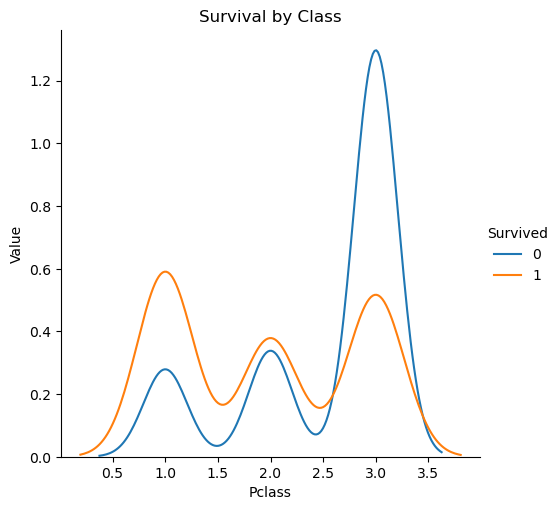

In [11]:
#Using new_df, create the FacetGrid to show the numbers who Survived by Class

#set the parameters you require
x=sns.FacetGrid(new_df, hue='Survived', height=5).map(sns.kdeplot, 'Pclass').add_legend()

#set the title and label
plt.title("Survival by Class" )
plt.ylabel("Value")

#show the chart
plt.show()

### 6 Create a FacetGrid to Show Survival by Age
  
Remember in the Survived column - 1 means survived, 0 means died 

In [12]:
#Save your dataframe df to a new frame df

#Add a new column to new_df named Count and populate it with a 1 

#Group by Age and Survived count the numbers in each group

#View the results - what do these mean?

In [13]:
#Using new_df, create the FacetGrid to show the numbers who Survived by Age


### 7 Create a Box and Whisker Chart to Show the Age of People who Died by Class

Remember in the Survived column - 1 means survived, 0 means died  
The calculations have been done for you

In [14]:
#Perform a series of calculations to get the Ages for people who died in each class
pclass1 = df.loc[(df.Pclass == 1) & (df.Survived == 0)]['Age']
pclass2 = df.loc[(df.Pclass == 2) & (df.Survived == 0) ]['Age']
pclass3 = df.loc[(df.Pclass == 3) & (df.Survived == 0)]['Age']

#Add the results to a list named died
died = [pclass1, pclass2, pclass3]

In [15]:
#Create the box and whisker chart to display the Age of People who died by Class



### 8 Create a Pie Chart to Show the Percentage of People who Died by Gender and Class

The calculations have been done for you
Remember in the Survived column - 1 means survived, 0 means died  

* Set the shart size to 9*9
* Use an appropriate title
* Use appropriate annotations on the segments and position appropriately
* Explode the chart if necessarye segments and position appropriately
* Explode the chart if necessary

In [16]:
#Perform a series of calculations to get the number of passengers in each class and gender, who died
malePclass1 = df.Pclass[(df.Pclass == 1) & (df.Gender == 0) & (df.Survived == 0)].count()
malePclass2 = df.Pclass[(df.Pclass == 2) & (df.Gender == 0) & (df.Survived == 0)].count()
malePclass3 = df.Pclass[(df.Pclass == 3) & (df.Gender == 0) & (df.Survived == 0)].count()
femalePclass1 = df.Pclass[(df.Pclass == 1) & (df.Gender == 1) & (df.Survived == 0)].count()
femalePclass2 = df.Pclass[(df.Pclass == 2) & (df.Gender == 1 & (df.Survived == 0))].count()
femalePclass3 = df.Pclass[(df.Pclass == 3) & (df.Gender == 1 & (df.Survived == 0))].count()

#Add the reults to a list called passengers
passengers = [malePclass1, malePclass2, malePclass3, femalePclass1, femalePclass2, femalePclass3]
print(passengers)

[77, 91, 300, 3, 23, 119]


In [17]:
#Create the pie chart to show the Percentage of People who Died by Gender and Class. 
#Explode the pie chart if necessary
#Show labels and percentage values on your chart


### 9 Comparative Bar Charts 

We will be creating bar charts to show the number of passengers boarding by gender and class, and the number of passengers who survived by gender and class

#### Create a Bar Chart to Show the Number of Passengers Boarding by Gender and Class

In [18]:
#Create a range of calculations that will be used when creating the charts

##Calculating numbers BOARDING by gender and class
male1 = df.Gender[(df['Gender'] == 0) & (df['Pclass'] == 1)].count()
male2 = df.Gender[(df['Gender'] == 0) & (df['Pclass'] == 2)].count()
male3 = df.Gender[(df['Gender'] == 0) & (df['Pclass'] == 3)].count()

#Assign your results to a new list
malesOnboard = [male1, male2, male3]

female1 = df.Gender[(df['Gender'] == 1) & (df['Pclass'] == 1)].count()
female2 = df.Gender[(df['Gender'] == 1) & (df['Pclass'] == 2)].count()
female3 = df.Gender[(df['Gender'] == 1) & (df['Pclass'] == 3)].count()

#Assign your results to a new list
femalesOnboard = [female1, female2, female3]

#Calculating numbers SURVIVING by gender and class
maleSurvived1 = df.Survived[(df['Survived'] == 1) & (df['Gender'] == 0) & (df['Pclass'] == 1)].count()
maleSurvived2 = df.Survived[(df['Survived'] == 1) & (df['Gender'] == 0) & (df['Pclass'] == 2)].count()
maleSurvived3 = df.Survived[(df['Survived'] == 1) & (df['Gender'] == 0) & (df['Pclass'] == 3)].count()

#Assign your results to a new list
survivalMale = [maleSurvived1, maleSurvived2, maleSurvived3]

femaleSurvived1 = df.Survived[(df['Survived'] == 1) & (df['Gender'] == 1) & (df['Pclass'] == 1)].count()
femaleSurvived2 = df.Survived[(df['Survived'] == 1) & (df['Gender'] == 1) & (df['Pclass'] == 2)].count()
femaleSurvived3 = df.Survived[(df['Survived'] == 1) & (df['Gender'] == 1) & (df['Pclass'] == 3)].count()

#Assign your results to a new list
survivalFemale = [femaleSurvived1, femaleSurvived2, femaleSurvived3]

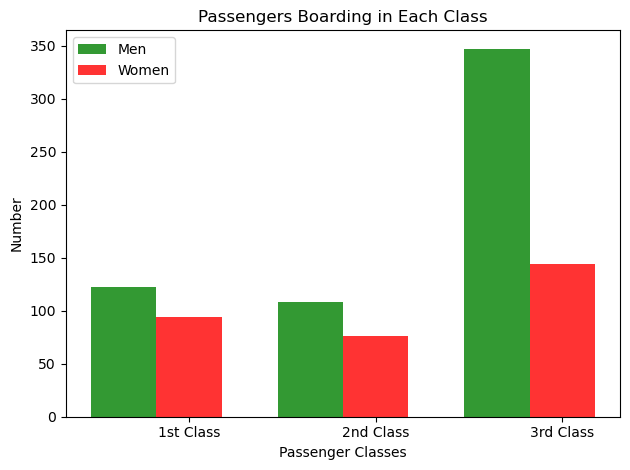

In [19]:
#Create the bar chart to show the number of passengers boarding by gender and class

# data to plot
n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, malesOnboard, bar_width,
alpha=opacity,
color='g',
label='Men')

rects2 = plt.bar(index + bar_width, femalesOnboard, bar_width,
alpha=opacity,
color='r',
label='Women')

plt.xlabel('Passenger Classes')
plt.ylabel('Number')
plt.title('Passengers Boarding in Each Class')
plt.xticks(index + bar_width, ('1st Class', '2nd Class', '3rd Class'))
plt.legend()

plt.tight_layout()
plt.show()

#### Create a Bar Chart to Show the Number of Passengers Surviving by Gender and Class

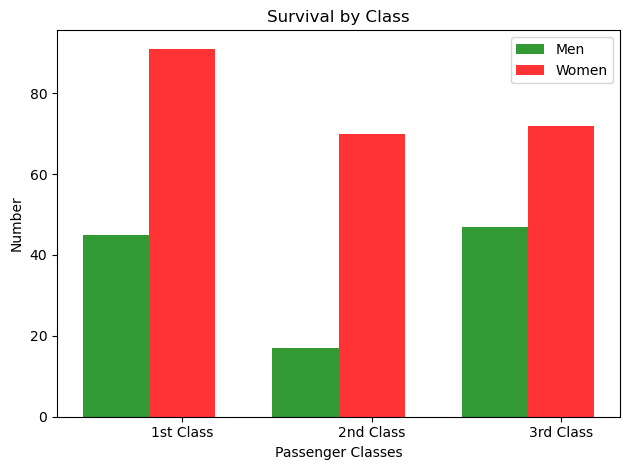

In [20]:
#Create the bar chart to show the number of passengers surviving by gender and class

# data to plot
n_groups = 3

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, survivalMale, bar_width,
alpha=opacity,
color='g',
label='Men')

rects2 = plt.bar(index + bar_width, survivalFemale, bar_width,
alpha=opacity,
color='r',
label='Women')

plt.xlabel('Passenger Classes')
plt.ylabel('Number')
plt.title('Survival by Class')
plt.xticks(index + bar_width, ('1st Class', '2nd Class', '3rd Class'))
plt.legend()

plt.tight_layout()
plt.show()


#### Create Subplots to Show 2 Charts,  the First Showing the Number of Passengers Boarding by Gender and Class and the Second Surviving by Gender and Class

**Note:** The calculations used here have already been created above

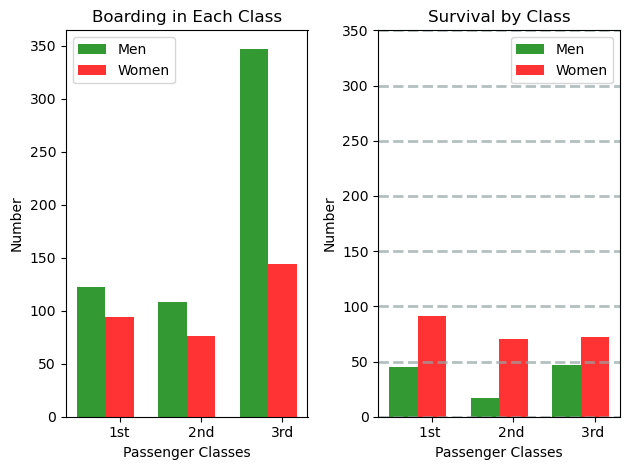

In [21]:
#Create subplots to show the number of passengers boarding by gender and class and surviving by gender and class

# data to plot
n_groups = 3

#Set the plot figure
fig = plt.figure()

#Declare ax1 as the first subplot - on the left - with 121
ax1 = fig.add_subplot(121)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = ax1.bar(index, malesOnboard, bar_width,
alpha=opacity,
color='g',
label='Men')

rects2 = ax1.bar(index + bar_width, femalesOnboard, bar_width,
alpha=opacity,
color='r',
label='Women')

plt.xlabel('Passenger Classes')
plt.ylabel('Number')
plt.title('Boarding in Each Class')
plt.xticks(index + bar_width, ('1st', '2nd', '3rd'))

#while the other plt code above does not change - the legend reference does
ax1.legend()



## Declare ax2 as the 2nd subplot - the panel on the right - with 122
ax2 = fig.add_subplot(122)
props = dict(alpha=0.5, edgecolors='none' )

rects1 = ax2.bar(index, survivalMale, bar_width,
alpha=opacity,
color='g',
label='Men')

rects2 = ax2.bar(index + bar_width, survivalFemale, bar_width,
alpha=opacity,
color='r',
label='Women')

plt.xlabel('Passenger Classes')
plt.ylabel('Number')
plt.title('Survival by Class')
plt.xticks(index + bar_width, ('1st ', '2nd ', '3rd '))

#If you wanted - you could add gridlines
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

#while the other plt code above does not change - the legend reference does
ax2.legend()

#To compare the graphs it would be important that they both have the same scale
#Now a clear picture of how many survived in each class can obtained
ax2.set_ylim([0, 350])

plt.tight_layout()
plt.show()


What can we conclude from looking at the charts above?